In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

filename = "/home/jude/Workspace/SECDA-TFLite/tensorflow/.data/mm2im.csv"
# read csv file in pandas dataframe
df = pd.read_csv(filename , sep=',', header=0)

display(df)

,process_cycles,compute_cycles,T_in_0,T_in_1,T_in_2,T_in_3,T_in_4,T_sh_0,T_sh_1,T_sh_2,T_sh_4,T_sh_6,T_sh_7,T_sh_9,T_sh_71,T_sh_75,T_ld_1,T_ld_2,T_ld_3,T_ld_4,T_ld_20,T_ld_21,T_ld_22,T_ld_23,T_ld_24,T_ld_25,T_ld_26,T_ld_27,T_ld_50,T_com_0,T_com_1,T_com_2,T_com_3,T_com_6,T_com_11,T_com_13,T_com_51,T_com_61,T_sd_0,T_sd_1,T_sd_3,T_sd_4,T_sd_5,T_sd_6,T_pd_0,T_pd_1,T_pd_2,T_pd_3
0,3024848,237472,1,1776,27,208494,3260512,2,210328,48,56096,3024848,1280,32,177664,512,3262347,16,384,32,26030,26000,26000,26000,26000,26000,26000,26000,1,1,1771,26126,16,237472,162720,16,541168,2501520,1,297737,176384,2974160,4608,17920,1,608697,196608,2665504


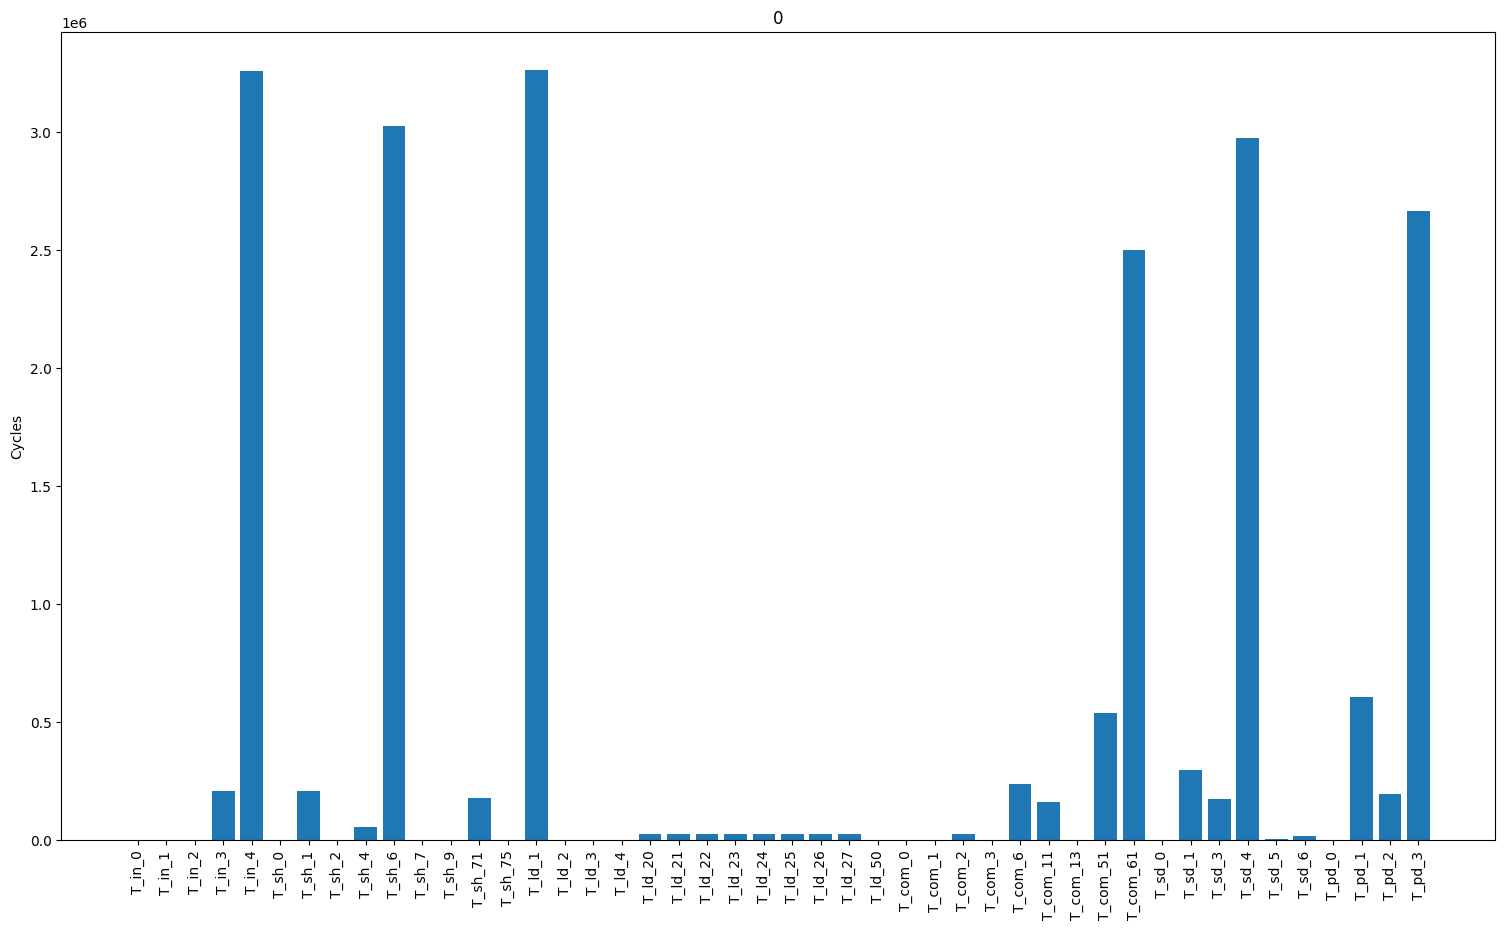

In [18]:
df = pd.read_csv(filename , sep=',', header=0)
# loop through each row in the dataframe
for index, row in df.iterrows():
    # drop column "cycles" from the row
    # row = row.drop(['cycles'])
    # drop every column expect "cycles" from the dataframe
    # cols = ["cycles", "idle1", "load_inps", "load_wgts", "gemm1", "post1", "compute"]
    cols = ["cycles", "idle1", "load_inps", "load_wgts", "gemm1", "post1", "compute"]

    for col in df.columns:
        if (
            (not col.startswith("T_"))

        ):
            row = row.drop([col])

    # create a figure and axis
    fig, ax = plt.subplots()
    #increase figure size
    fig.set_size_inches(18.5, 10.5)
    # set the title
    # create bar chart with the row data
    ax.bar(row.index, row)
    # set the x-axis tick marks to the column names
    ax.xaxis.set_major_locator(ticker.FixedLocator(range(len(row.index))))
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(row.index))
    # rotate the x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=90)
    # set the y-axis label
    ax.set_ylabel("Cycles")
    # set the title
    ax.set_title(row.name)
    # show the plot
    plt.show()
    # print idle1 / compute

    break